(C) Copyright 2024 IBM

Any modifications or derivative works of this code must retain this
copyright notice, and modified files need to carry a notice indicating
that they have been altered from the originals.

This code is associated to the paper "Diagonalization of large many-body Hamiltonians on a quantum processor" [https://arxiv.org/abs/2407.14431](https://arxiv.org/abs/2407.14431).

In [1]:
import sys
import numpy as np
import itertools
import matplotlib.pyplot as plt

sys.path.append('..')

from utils import optimize_threshold

In [2]:
D = 10

init_threshold too high
1.0000000000000002e-08


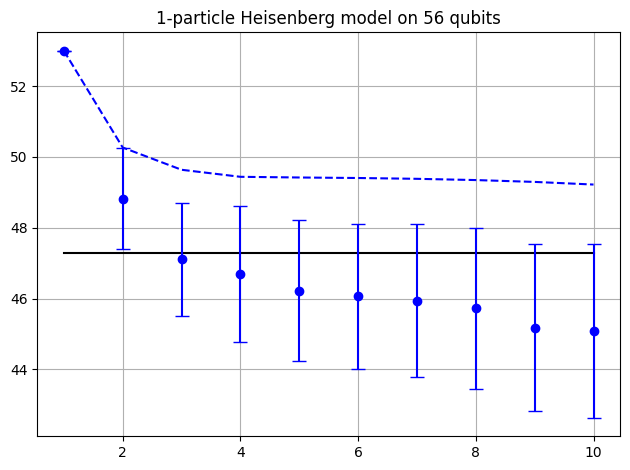

In [3]:
# k=1

H_D_orig_first_row = [(53+0j),
 (28.53243242620816-23.93681631283742j),
 (-0.9300576639977634-10.753389975553505j),
 (-0.11246875706883808+8.941112296949655j),
 (11.049108548308691+7.875540794875025j),
 (5.562558165066114-1.293347733393773j),
 (0.06115350708695841-0.33129569579826834j),
 (1.6175142148754384-1.8851939198149856j),
 (-2.89671456191702-9.294979431561785j),
 (-12.710337817438932-5.864613496630863j)]

S_D_orig_first_row = [(1+0j),
 (0.6163602782185176-0.4108927828531177j),
 (0.025490943630504123-0.20647783736493808j),
 (0.028182751990161688+0.18716857323004765j),
 (0.23364913531039705+0.1664104846509838j),
 (0.1355040970990385-0.013686204215073203j),
 (0.01146682732372411-0.0026024095920627226j),
 (0.023711761977310244-0.05125606237197507j),
 (-0.09766579402920672-0.19127720795146952j),
 (-0.25169499034171483-0.08049025004347005j)]

H_orig = np.zeros((D,D), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in itertools.product(range(D),repeat=2):
    if i >= j:
        H_orig[j,i] = H_D_orig_first_row[i-j]
    else:
        H_orig[j,i] = np.conj(H_D_orig_first_row[j-i])

S_orig = np.zeros((D,D), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in itertools.product(range(D),repeat=2):
    if i >= j:
        S_orig[j,i] = S_D_orig_first_row[i-j]
    else:
        S_orig[j,i] = np.conj(S_D_orig_first_row[j-i])

threshold, gs_en_orig_1, copt = optimize_threshold(D, H_orig, S_orig, 0, fit_tol=0.5, init_threshold=1e-8, skip_D=0, dimn_scaling=1)
print(threshold)

# Load bootstraps
bootstrap_energies_1 = np.load('./k1_57q_expt_11172023_130221/bootstrap_energies_resampled_twirls.npy')

exact_gse_1 = 47.3
ideal_energies_1 = [53.0, 50.26620886360336, 49.637400982433334, 49.43872596374586, 49.419345904966455, 49.40500273649022, 49.38193112189971, 49.346687064678285, 49.29459360383621, 49.22007248261492]



# PLOT
plt.plot(range(1,D+1), [exact_gse_1]*D, label = 'exact', color='k')

stds = np.apply_along_axis(np.std, 0, bootstrap_energies_1)
plt.errorbar(range(1,D+1), gs_en_orig_1, stds, label='experiment', color='blue', capsize=5, fmt='o')

plt.plot(range(1,D+1), ideal_energies_1[:D], label='ideal simulation', color='blue', linestyle='dashed')
# plt.plot(range(1,D+1), gs_en_orig, label='orig')

# plt.xlabel('Krylov dimension')
# plt.ylabel('Ground state energy estimate')

plt.grid()
# plt.legend(loc='upper right')
plt.title('1-particle Heisenberg model on 56 qubits')

plt.tight_layout()
plt.savefig('./plots/1_particle_scatter.pdf')

0.11146304374111922


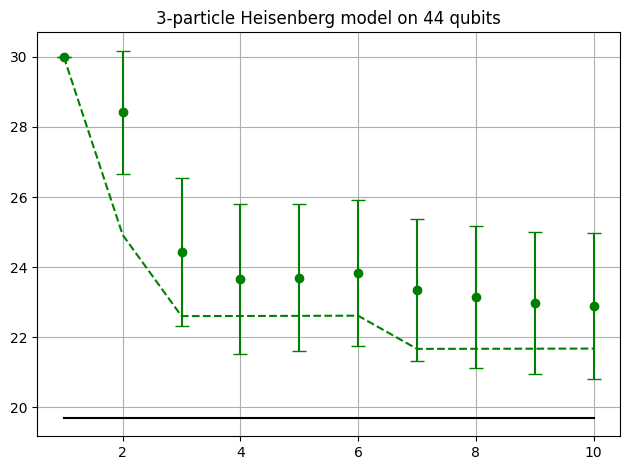

In [4]:
# k=3

H_D_orig_first_row = np.array([(30+0j), (13.499766255552899-14.854446630518897j), (-1.3478024712245782-13.355501237416398j), (-13.806535730051946-19.970339342595754j), (-21.4157095972466+11.804826062811397j), (-1.6407022229703934+24.815618292059103j), (3.8007146552174924+7.291557684106622j), (11.063423053529629+2.71092412185557j), (6.800051994493438-6.793119990532535j), (1.6997763500311431-14.848706896956948j)])
S_D_orig_first_row = np.array([(1+0j), (0.5266479812396606-0.5424956098897443j), (-0.12184718633293834-0.9821795050818003j), (-0.7482478278619616-0.5693079402664377j), (-0.7754755997334237+0.19808625911442668j), (-0.3965364436101847+0.7593022861276391j), (0.1912831853664751+0.8364929917867608j), (0.4171891872286598+0.11412419666346905j), (0.380064652085793-0.1223454734068309j), (0.07009011394574552-0.6067081105001572j)])

H_orig = np.zeros((D,D), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in itertools.product(range(D),repeat=2):
    if i >= j:
        H_orig[j,i] = H_D_orig_first_row[i-j]
    else:
        H_orig[j,i] = np.conj(H_D_orig_first_row[j-i])

S_orig = np.zeros((D,D), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in itertools.product(range(D),repeat=2):
    if i >= j:
        S_orig[j,i] = S_D_orig_first_row[i-j]
    else:
        S_orig[j,i] = np.conj(S_D_orig_first_row[j-i])

threshold, gs_en_orig_3, copt = optimize_threshold(D, H_orig, S_orig, 0, fit_tol=0.5, init_threshold=1e-8, skip_D=1, dimn_scaling=1)
print(threshold)

# Load bootstraps
bootstrap_energies_3 = np.load('./k3_44q_expt_04152024_183021/bootstrap_energies.npy')

exact_gse_3 = 19.7
ideal_energies_3 = [30.0, 24.920567651437906, 22.604488256635772, 22.607596047800424, 22.611592329066678, 22.616477410530205, 21.66960135813498, 21.67224290403467, 21.67524433543169, 21.678608513707577, 21.68233862642421, 21.68643818182625, 21.690911003677677, 21.293366172553153, 21.295629999852423, 21.298060179689426, 21.300658764971416, 21.303427941473874, 21.306370029226493, 21.30948748210564, 21.312782887886268, 21.316258967815955, 21.105244738021277, 21.10709139000172, 21.109031232295116, 21.11106609680373, 21.113197889894025, 21.115428591998473, 21.117760257212307]



# PLOT
plt.plot(range(1,D+1), [exact_gse_3]*D, label = 'exact', color='k')

stds = np.apply_along_axis(np.std, 0, bootstrap_energies_3)
plt.errorbar(range(1,D+1), gs_en_orig_3, stds, label='experiment', color='green', capsize=5, fmt='o')

plt.plot(range(1,D+1), ideal_energies_3[:D], label='ideal simulation', color='green', linestyle='dashed')
# plt.plot(range(1,D+1), gs_en_orig, label='orig')

# plt.xlabel('Krylov dimension')
# plt.ylabel('Ground state energy estimate')

plt.grid()
# plt.legend(loc='upper right')
plt.title('3-particle Heisenberg model on 44 qubits')

plt.tight_layout()
plt.savefig('./plots/3_particle_scatter.pdf')

init_threshold too high
1.0000000000000002e-08


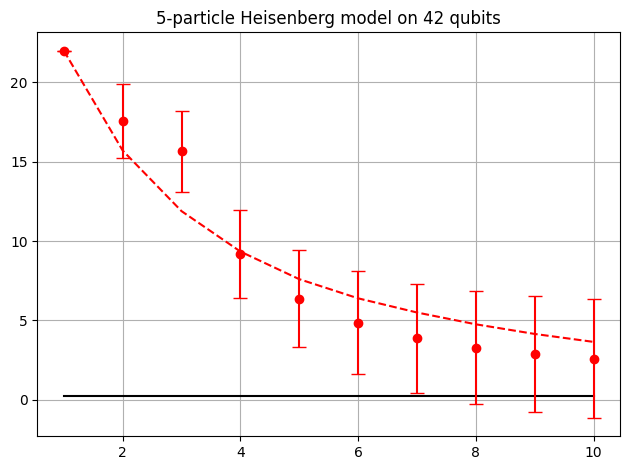

In [5]:
# k=5

H_D_orig_first_row = np.array([(22+0j), (8.716840910123963+2.319452631767244j), (3.4022204146549244-1.2483965017969192j), (0.3948420189603626-0.5952260595097173j), (1.0454390004068013-0.49885255528749667j), (1.4335117630108252-0.2752727785851759j), (0.09300333331607469-0.22472591301908298j), (-0.5786116436757464-0.2532705337185325j), (0.09172989635871583-0.12046701991177436j), (-0.38869884594890663-0.06994646041976647j)])
S_D_orig_first_row = np.array([(1+0j), (0.521250550648346-0.11907289066907847j), (0.19022616657225414-0.020499870299625578j), (0.9627322498845279+0.0053831346741941115j), (0.0609237595958957-0.015167283189197214j), (0.021468921441516103-0.004725770770306402j), (-0.0026709133278443524+0.010103570016125102j), (0.013362764429136741+0.027251198335373015j), (0.003070381772744932+0.00747620967010522j), (-0.008874880198973307+0.014996819949954863j)])

H_orig = np.zeros((D,D), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in itertools.product(range(D),repeat=2):
    if i >= j:
        H_orig[j,i] = H_D_orig_first_row[i-j]
    else:
        H_orig[j,i] = np.conj(H_D_orig_first_row[j-i])

S_orig = np.zeros((D,D), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in itertools.product(range(D),repeat=2):
    if i >= j:
        S_orig[j,i] = S_D_orig_first_row[i-j]
    else:
        S_orig[j,i] = np.conj(S_D_orig_first_row[j-i])

threshold, gs_en_orig_5, copt = optimize_threshold(D, H_orig, S_orig, 0, fit_tol=0.5, init_threshold=1e-8, skip_D=2, dimn_scaling=1)
print(threshold)

# Load bootstraps
bootstrap_energies_5 = np.load('./k5_44q_expt_04172024_113511/bootstrap_energies.npy')

exact_gse_5 = 0.21437394964394724
ideal_energies_5 = [22.0, 15.708236379656595, 11.888978106414612, 9.342015166239126, 7.601699857482943, 6.39490492683488, 5.501869062506637, 4.758045137979257, 4.1501863410535895, 3.649258805644034]



# PLOT
plt.plot(range(1,D+1), [exact_gse_5]*D, label = 'exact', color='k')

stds = np.apply_along_axis(np.std, 0, bootstrap_energies_5)
plt.errorbar(range(1,D+1), gs_en_orig_5, stds, label='experiment', color='red', capsize=5, fmt='o')

plt.plot(range(1,D+1), ideal_energies_5[:D], label='ideal simulation', color='red', linestyle='dashed')
# plt.plot(range(1,D+1), gs_en_orig, label='orig')

# plt.xlabel('Krylov dimension')
# plt.ylabel('Ground state energy estimate')

plt.grid()
# plt.legend(loc='upper right')
plt.title('5-particle Heisenberg model on 42 qubits')

plt.tight_layout()
plt.savefig('./plots/5_particle_scatter.pdf')

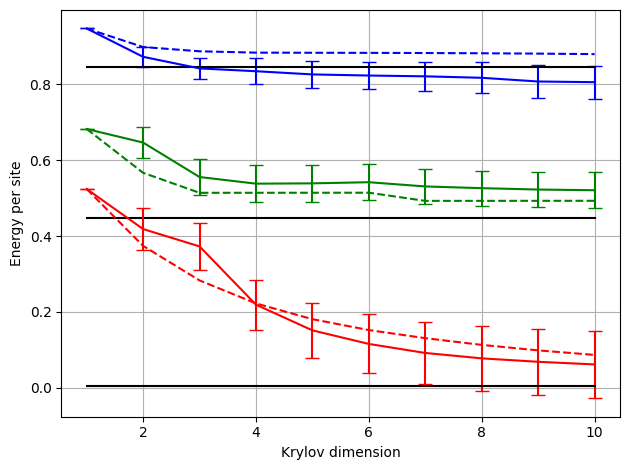

In [6]:
D = 10

n_sites = 56
stds = np.apply_along_axis(np.std, 0, bootstrap_energies_1)
plt.errorbar(range(1,D+1), np.array(gs_en_orig_1)/n_sites, stds/n_sites, label='experiment', color='blue', capsize=5)

plt.plot(range(1,D+1), np.array(ideal_energies_1[:D])/n_sites, label='ideal simulation', color='blue', linestyle='dashed')
plt.plot(range(1,D+1), [exact_gse_1/n_sites]*D, label = 'exact', color='k')

n_sites = 44
stds = np.apply_along_axis(np.std, 0, bootstrap_energies_3)
plt.errorbar(range(1,D+1), np.array(gs_en_orig_3)/n_sites, stds/n_sites, color='green', capsize=5)

plt.plot(range(1,D+1), np.array(ideal_energies_3[:D])/n_sites, color='green', linestyle='dashed')
plt.plot(range(1,D+1), [exact_gse_3/n_sites]*D, color='k')

n_sites = 42
stds = np.apply_along_axis(np.std, 0, bootstrap_energies_5)
plt.errorbar(range(1,D+1), np.array(gs_en_orig_5)/n_sites, stds/n_sites, color='red', capsize=5)

plt.plot(range(1,D+1), np.array(ideal_energies_5[:D])/n_sites, color='red', linestyle='dashed')
plt.plot(range(1,D+1), [exact_gse_5/n_sites]*D, color='k')
# plt.plot(range(1,D+1), gs_en_orig, label='orig')

plt.xlabel('Krylov dimension')
plt.ylabel('Energy per site')

plt.grid()
# plt.legend(loc='lower left')
plt.title('')

plt.tight_layout()
plt.savefig('./plots/all_convergence_curves.pdf')

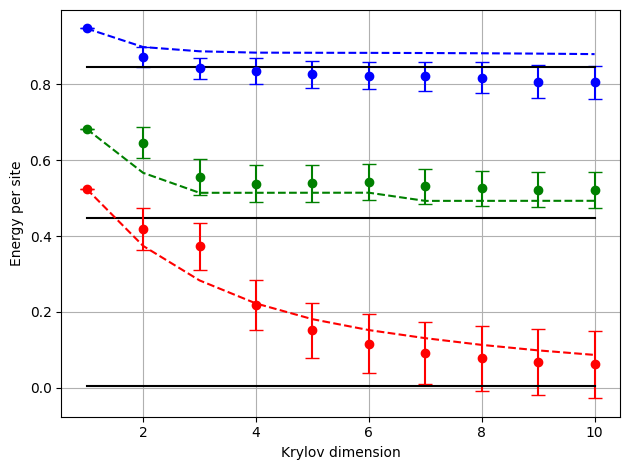

In [7]:
D = 10

n_sites = 56
stds = np.apply_along_axis(np.std, 0, bootstrap_energies_1)
plt.errorbar(range(1,D+1), np.array(gs_en_orig_1)/n_sites, stds/n_sites, label='experiment', color='blue', capsize=5, fmt='o')

plt.plot(range(1,D+1), np.array(ideal_energies_1[:D])/n_sites, label='ideal simulation', color='blue', linestyle='dashed')
plt.plot(range(1,D+1), [exact_gse_1/n_sites]*D, label = 'exact', color='k')

n_sites = 44
stds = np.apply_along_axis(np.std, 0, bootstrap_energies_3)
plt.errorbar(range(1,D+1), np.array(gs_en_orig_3)/n_sites, stds/n_sites, color='green', capsize=5, fmt='o')

plt.plot(range(1,D+1), np.array(ideal_energies_3[:D])/n_sites, color='green', linestyle='dashed')
plt.plot(range(1,D+1), [exact_gse_3/n_sites]*D, color='k')

n_sites = 42
stds = np.apply_along_axis(np.std, 0, bootstrap_energies_5)
plt.errorbar(range(1,D+1), np.array(gs_en_orig_5)/n_sites, stds/n_sites, color='red', capsize=5, fmt='o')

plt.plot(range(1,D+1), np.array(ideal_energies_5[:D])/n_sites, color='red', linestyle='dashed')
plt.plot(range(1,D+1), [exact_gse_5/n_sites]*D, color='k')
# plt.plot(range(1,D+1), gs_en_orig, label='orig')

plt.xlabel('Krylov dimension')
plt.ylabel('Energy per site')

plt.grid()
# plt.legend(loc='lower left')
plt.title('')

plt.tight_layout()
plt.savefig('./plots/all_convergence_curves_scatter.pdf')

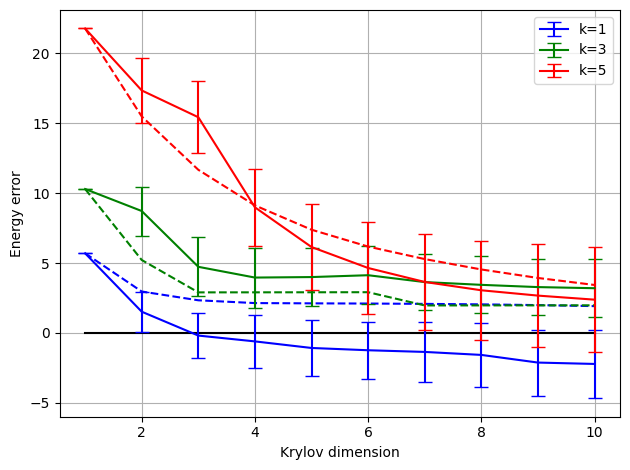

In [8]:
plt.plot(range(1,D+1), [0]*D, color='k')

stds = np.apply_along_axis(np.std, 0, bootstrap_energies_1)
plt.errorbar(range(1,D+1), np.array(gs_en_orig_1) - exact_gse_1, stds, label='k=1', color='blue', capsize=5)
# plt.plot(range(1,D+1), np.array(gs_en_orig_1) - exact_gse_1, label='k=1', color='blue')

plt.plot(range(1,D+1), np.array(ideal_energies_1[:D]) - exact_gse_1, color='blue', linestyle='dashed')
# plt.plot(range(1,D+1), [exact_gse_1]*D, label = 'exact', color='r')

stds = np.apply_along_axis(np.std, 0, bootstrap_energies_3)
plt.errorbar(range(1,D+1), np.array(gs_en_orig_3) - exact_gse_3, stds, color='green', capsize=5, label='k=3')
# plt.plot(range(1,D+1), np.array(gs_en_orig_3) - exact_gse_3, label='k=3', color='green')

plt.plot(range(1,D+1), np.array(ideal_energies_3[:D]) - exact_gse_3, color='green', linestyle='dashed')
# plt.plot(range(1,D+1), [exact_gse_3]*D, color='r')

stds = np.apply_along_axis(np.std, 0, bootstrap_energies_5)
plt.errorbar(range(1,D+1), np.array(gs_en_orig_5) - exact_gse_5, stds, color='red', capsize=5, label='k=5')
# plt.plot(range(1,D+1), np.array(gs_en_orig_5) - exact_gse_5, label='k=5', color='red')

plt.plot(range(1,D+1), np.array(ideal_energies_5[:D]) - exact_gse_5, color='red', linestyle='dashed')
# plt.plot(range(1,D+1), gs_en_orig, label='orig')

plt.xlabel('Krylov dimension')
plt.ylabel('Energy error')

plt.grid()
plt.legend(loc='upper right')
plt.title('')

plt.tight_layout()
plt.savefig('./plots/all_error_curves.pdf')